In [1]:
from collections import deque
import numpy as np

# 创建一个最大长度为5的deque
dq = deque(maxlen=5)
dq.append(1)
dq.append(2)
dq.append(3)
dq.append(4)
dq.append(5)
# 此时再添加元素，最老的元素（1）将被移除
dq.append(6)
print(dq)  # 输出: deque([2, 3, 4, 5, 6], maxlen=5)

deque([2, 3, 4, 5, 6], maxlen=5)


In [2]:
import customtkinter
from customtkinter import CTk

app = customtkinter.CTk()
app.geometry("600x600")

def checkbox_event():
    print("checkbox toggled, current value:", check_var.get())

check_var = customtkinter.StringVar(value="on")
checkbox = customtkinter.CTkCheckBox(app, text="CTkCheckBox", command=checkbox_event,
                                     variable=check_var, onvalue="on", offvalue="off")
def combobox_callback(choice):
    print("combobox dropdown clicked:", choice)

combobox = customtkinter.CTkComboBox(app, values=["option 1", "option 2"],
                                     command=combobox_callback)
combobox.set("option 2")

def optionmenu_callback(choice):
    print("optionmenu dropdown clicked:", choice)

optionmenu_var = customtkinter.StringVar(value="option 2")
optionmenu = customtkinter.CTkOptionMenu(app,values=["option 1", "option 2"],
                                         command=optionmenu_callback,
                                         variable=optionmenu_var)
customtkinter.CTkCanvas(app, width=200, height=200, bg="blue").pack()
progressbar = customtkinter.CTkProgressBar(app, orientation="horizontal")

def segmented_button_callback(value):
    print("segmented button clicked:", value)

segemented_button = customtkinter.CTkSegmentedButton(app, values=["Value 1", "Value 2", "Value 3"],
                                                     command=segmented_button_callback)
segemented_button.set("Value 1")

def switch_event():
    print("switch toggled, current value:", switch_var.get())

switch_var = customtkinter.StringVar(value="on")
switch = customtkinter.CTkSwitch(app, text="CTkSwitch", command=switch_event,
                                 variable=switch_var, onvalue="on", offvalue="off")
switch.pack()
segemented_button.pack()
progressbar.pack()
optionmenu.pack()
combobox.pack()
checkbox.pack()  # 添加这行代码将复选框添加到窗口中

app.mainloop()

In [16]:
data = [[0, 1, 1, 48, 42, 100, 0, 0, 0, -28], [1, 1, 1, 54, 52, 100, 0, 0, 0, -30], [2, 1, 1, 48, 34, 100, 0, 0, 0, -23], [3, 1, 1, 46, 35, 100, 0, 0, 0, -25], [4, 1, 1, 56, 38, 100, 0, 0, 0, -32], [5, 1, 1, 60, 41, 100, 0, 0, 0, -37], [6, 1, 1, 59, 43, 100, 0, 0, 0, -39], [7, 1, 1, 46, 38, 100, 0, 0, 0, -33], [8, 1, 1, 43, 36, 100, 0, 0, 0, -29], [9, 1, 1, 41, 38, 100, 0, 0, 0, -26], [10, 1, 1, 36, 35, 100, 0, 0, 0, -22], [11, 1, 1, 44, 32, 100, 0, 0, 0, -23], [12, 1, 1, 39, 35, 100, 0, 0, 0, -23], [13, 1, 1, 37, 41, 100, 0, 0, 0, -21], [14, 1, 1, 37, 40, 100, 0, 0, 0, -17], [15, 1, 1, 50, 42, 100, 0, 0, 0, -21], [16, 1, 1, 49, 41, 100, 0, 0, 0, -22], [17, 1, 1, 41, 46, 100, 0, 0, 0, -20], [18, 1, 1, 39, 40, 100, 0, 0, 0, -15], [19, 1, 1, 43, 39, 100, 0, 0, 0, -16], [20, 1, 1, 39, 41, 100, 0, 0, 0, -16], [21, 1, 1, 42, 45, 100, 0, 0, 0, -16], [22, 1, 1, 42, 45, 100, 0, 0, 0, -14], [23, 1, 1, 42, 43, 100, 0, 0, 0, -12], [24, 1, 1, 39, 39, 100, 0, 0, 0, -11], [25, 1, 1, 37, 44, 100, 0, 0, 0, -11], [31, 2, 1, 51, 38, 100, 0, 0, 0, -26], [32, 2, 1, 53, 41, 100, 0, 0, 0, -31], [26, 1, 1, 35, 40, 100, 0, 0, 0, -9], [27, 1, 1, 43, 43, 100, 0, 0, 0, -12], [28, 1, 1, 35, 44, 100, 0, 0, 0, -9], [29, 1, 1, 37, 44, 100, 0, 0, 0, -8], [30, 2, 0, 0, 37, 100, 0, 0, 0, 0], [33, 2, 1, 41, 39, 100, 0, 0, 0, -20], [34, 2, 1, 43, 38, 100, 0, 0, 0, -20], [35, 2, 1, 45, 36, 100, 0, 0, 0, -21], [36, 2, 1, 44, 35, 100, 0, 0, 0, -22], [37, 2, 1, 31, 38, 100, 0, 0, 0, -18], [38, 2, 1, 38, 44, 100, 0, 0, 0, -17], [39, 2, 1, 46, 46, 100, 0, 0, 0, -17], [40, 2, 1, 43, 46, 100, 0, 0, 0, -15], [41, 2, 1, 34, 40, 100, 0, 0, 0, -10], [42, 2, 1, 39, 40, 100, 0, 0, 0, -11], [43, 2, 1, 39, 43, 100, 0, 0, 0, -11], [44, 2, 1, 27, 45, 100, 0, 0, 0, -6], [45, 2, 1, 30, 39, 100, 0, 0, 0, -3], [46, 2, 1, 41, 38, 100, 0, 0, 0, -7], [47, 2, 1, 38, 37, 100, 0, 0, 0, -10], [48, 2, 1, 33, 38, 100, 0, 0, 0, -10], [49, 2, 1, 49, 30, 100, 0, 0, 0, -16], [50, 2, 1, 43, 34, 100, 0, 0, 0, -20], [51, 2, 1, 51, 30, 100, 0, 0, 0, -26], [52, 2, 1, 52, 31, 100, 0, 0, 0, -32], [53, 2, 1, 47, 33, 100, 0, 0, 0, -33], [54, 2, 1, 47, 43, 100, 0, 0, 0, -33], [55, 2, 1, 50, 41, 100, 0, 0, 0, -30], [56, 2, 1, 42, 44, 100, 0, 0, 0, -25], [57, 2, 1, 35, 45, 100, 0, 0, 0, -18], [58, 2, 1, 44, 48, 100, 0, 0, 0, -16]]

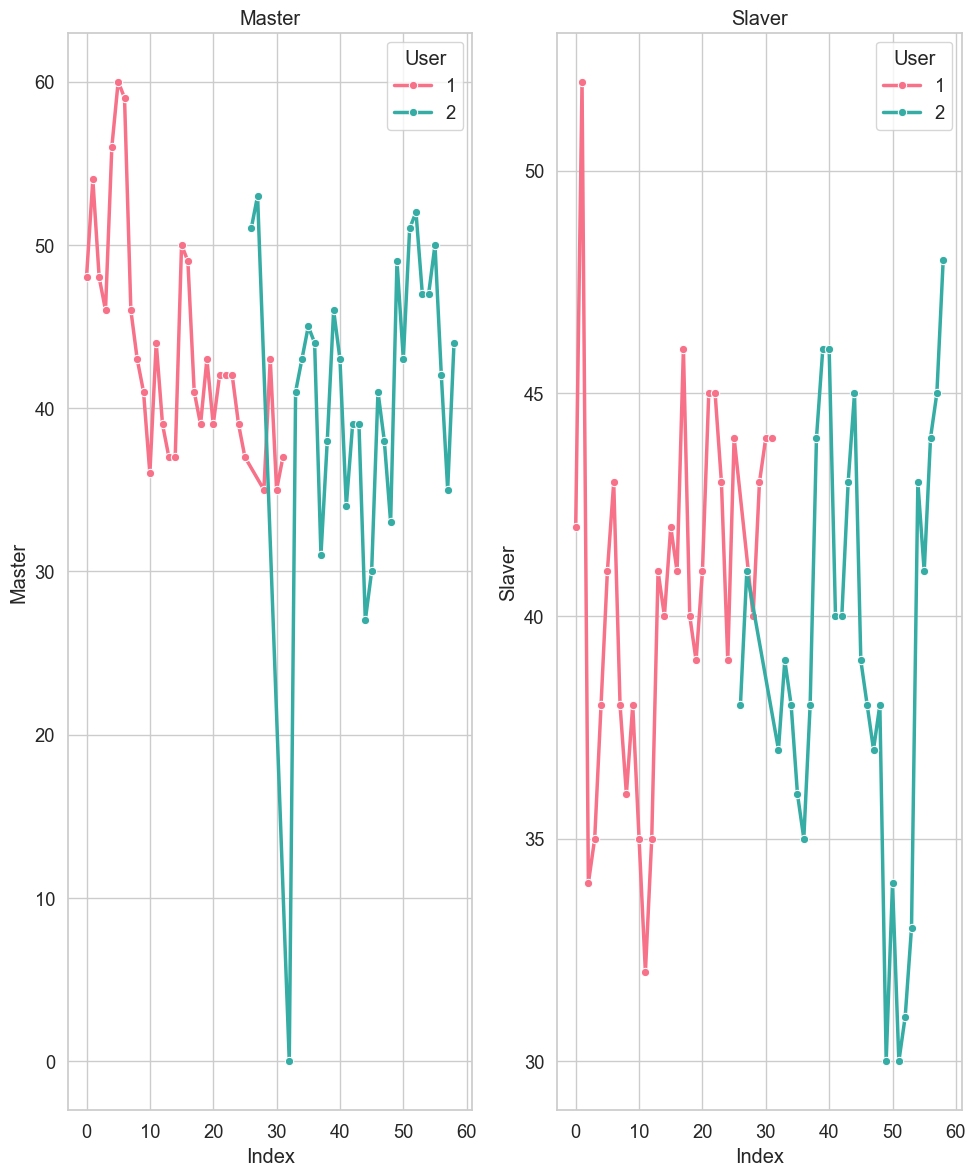

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


Master = [row[3] for row in data]
Slaver = [row[4] for row in data]
user = [row[1] for row in data]

plt.figure(figsize=(10, 12))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
palette = sns.color_palette("husl", len(set(user)))


plt.subplot(1, 2, 1)  # 参数表示(行数, 列数, 当前区域)
sns.lineplot(x=range(len(Master)), y=Master, hue=user, palette=palette, legend="full", marker="o")
plt.title("Master")
plt.xlabel("Index")
plt.ylabel("Master")
plt.legend(title="User")


plt.subplot(1, 2, 2)
sns.lineplot(x=range(len(Slaver)), y=Slaver, hue=user, palette=palette, legend="full", marker="o")
plt.title("Slaver")
plt.xlabel("Index")
plt.ylabel("Slaver")
plt.legend(title="User")

# 调整子图间距
plt.tight_layout()

plt.show()

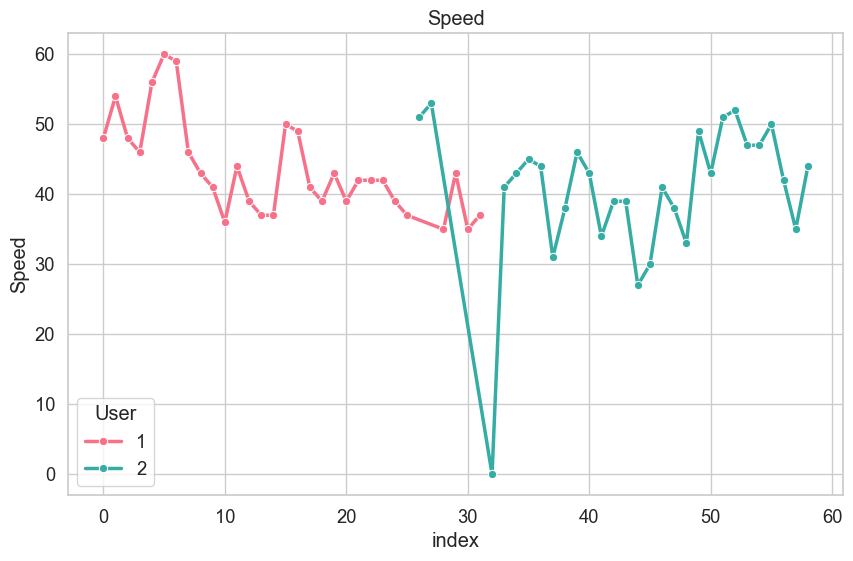

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Master = [row[3] for row in data]
Slaver = [row[4] for row in data]
user = [row[1] for row in data]

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
palette = sns.color_palette("husl", len(set(user)))

sns.lineplot(x=range(len(Master)), y=Master, hue=user, palette=palette, legend="full", marker="o")
plt.title("Master")
plt.xlabel("index")
plt.ylabel("Master")
plt.legend(title="User")
plt.show()